In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import glob,re
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
param_pattern = re.compile(r'\d\d-\d\d-\d\d \d{6}_5node_(sin|tri|sqr|saw)_(notests|tests)')
def getData(subpat):
    d = {}
    for f in glob.glob(subpat):
        inptype,tests = param_pattern.findall(f)[0]
        if(inptype not in d.keys()):
            d[inptype]= {}
        if(tests not in d[inptype].keys()):
            d[inptype][tests] = []
        
        data = pd.read_csv(f)
        if(data.shape[0] > 0 and data.shape[1] > 0):
            d[inptype][tests].append(data)
    return d

In [3]:
def calcAveAndStd(data):
    n = len(data)
    
    ave = data[0].copy()
    for d in data[1:]:
        ave += d.copy()
    
    ave = ave / n
    
    std = (ave - data[0].copy())**2
    for d in data[1:]:
        std += (ave - d.copy())**2
    
    std = (std / n).apply(np.sqrt)
    std['Generation'] = ave.copy()['Generation']
    return ave,std

In [4]:
def calcAveAndStd(data):
    n = len(data)
    
    ave = data[0].copy()
    for d in data[1:]:
        ave += d.copy()
    
    ave = ave / n
    
    std = (ave - data[0].copy())**2
    for d in data[1:]:
        std += (ave - d.copy())**2
    
    std = (std / n).apply(np.sqrt)
    std['Generation'] = ave.copy()['Generation']
    return ave,std

In [5]:
def calcAllStats(data):
    aves,stds = {},{}

    for inptype in data.keys():
        for tests in data[inptype]:
            if(tests not in aves.keys()):
                aves[tests],stds[tests] = {},{}
            if(len(data[inptype][tests]) is not 0):
                aves[tests][inptype],stds[tests][inptype] = calcAveAndStd(data[inptype][tests])
    return aves,stds

In [6]:
def gaTrace(data,error,sortedKeys = None,ci_multipler = 1.95,fig=None,ax=None,typ='',colors=None,linestyle='-'):
    
    if(sortedKeys is None):
        sortedKeys = sorted(data.keys())
    
    n = len(sortedKeys)
    
    seaborn.set_style('white')
    seaborn.set_context("paper", font_scale=3, rc={"lines.linewidth": 2.5})
    
    if(colors is None):
    # colors = seaborn.cubehelix_palette(7, start=1, rot=-5,dark=.1, light=.5)
        colors = seaborn.husl_palette(n,l=.4)
    shaded = np.hstack([colors,0.15*np.ones((n,1))])
    
    if(fig is None or ax is None):
        fig,ax = plt.subplots(figsize=(7,7))
    
    for i,k in enumerate(sortedKeys):
        u = data[k]['Max fitness']
        ci = error[k]['Max fitness']*ci_multipler

        ax.plot(u,color=colors[i],label=k+typ,linestyle=linestyle)
        ax.fill_between(data[k]['Generation']-1,u-ci,u+ci,color=shaded[i])

    plt.subplots_adjust(left=0.2)
        
#     plt.ylim([0.6,1.])
        
    return fig,ax

In [7]:
def drawAllGAPlots(aves,stds):
    for inptype in aves.keys():
        fig,ax = gaTrace(aves[inptype],stds[inptype])

        plt .title("%s" % (inptype))
        plt.ylabel('Maximum fitness')
        plt.xlabel('Generation')
        plt.legend(loc='lower right')
        fig.show()

/usr/local/lib/python3.4/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


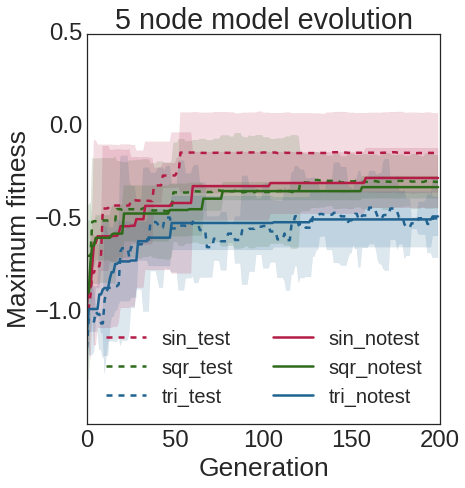

In [8]:
modelStats = getData('*/GA/modelStats*')
model_amp_aves,model_amp_std = calcAllStats(modelStats)

# colors = seaborn.husl_palette(6,l=.4)

fig,ax = gaTrace(model_amp_aves['tests'],model_amp_std['tests'],typ='_test',linestyle='--')

gaTrace(model_amp_aves['notests'],model_amp_std['notests'],fig=fig,ax=ax,typ='_notest',linestyle='-')

plt .title('5 node model evolution')
plt.ylabel('Maximum fitness')
plt.xlabel('Generation')
plt.legend(loc='lower right',ncol=2,prop={'size':20})


fig.savefig('5node_ga_summary_1.pdf')

fig.gca().set_yticks([-1.,-.5,0.,.5])

fig.show()


# plt .title('Test evolution')
# plt.ylabel('Maximum fitness')
# plt.xlabel('Generation')
# plt.legend(loc='lower right')
# fig.show()


In [9]:
from scipy import stats


tests,notests = [],[]

for typ in modelStats.keys():
    for d in modelStats[typ]['notests']:
        notests.append(d['Max fitness'].irow(-1))
    for d in modelStats[typ]['tests']:
        tests.append(d['Max fitness'].irow(-1))


print("tests:\t\tmean=%.2f\tstdev=%.2f\tN=%d" % (np.mean(tests),np.std(tests),len(tests)))
print("notests:\tmean=%.2f\tstdev=%.2f\tN=%d" % (np.mean(notests), np.std(notests),len(notests)))
        
        
t,p =stats.ttest_ind(tests,notests,equal_var=False)
p /= 2
print("t=%.2f, p=%f" % (t,p))

tests:		mean=-0.31	stdev=0.17	N=9
notests:	mean=-0.36	stdev=0.11	N=9
t=0.71, p=0.246371


In [10]:
np.savetxt("5node_tests.csv",tests,delimiter=',')
np.savetxt("5node_notests.csv",notests,delimiter=',')

In [11]:
((-.31)+(-.36))/2

-0.33499999999999996

In [12]:
ctrnnExp = getData('*/inspector/evolvedLOG_exp*')
fixedExp = getData('*/inspector/fixedLOG_exp*')
ctrnnStd = getData('*/inspector/evolvedLOG_std*')
fixedStd = getData('*/inspector/fixedLOG_std*')
ctrnnExp

{'sin': {'notests': [        neur0    input0     neur1  input1     neur2  input2     neur3  input3  \
   0    0.459283  0.000000  0.517279       0  0.365045       0  0.505128       0   
   1    0.386685 -0.008869  0.530302       0  0.287190       0  0.501176       0   
   2    0.325882 -0.017650  0.515249       0  0.212146       0  0.492956       0   
   3    0.278789 -0.026256  0.475944       0  0.141551       0  0.482445       0   
   4    0.245581 -0.034602  0.415666       0  0.076471       0  0.471487       0   
   5    0.225220 -0.042604  0.338703       0  0.017455       0  0.461672       0   
   6    0.216005 -0.050182  0.250983       0 -0.035483       0  0.454261       0   
   7    0.216006 -0.057260  0.159493       0 -0.082858       0  0.450164       0   
   8    0.223356 -0.063766  0.070902       0 -0.125634       0  0.449961       0   
   9    0.236417 -0.069632 -0.009723       0 -0.165062       0  0.453961       0   
   10   0.253862 -0.074796 -0.079428       0 -0.202496    

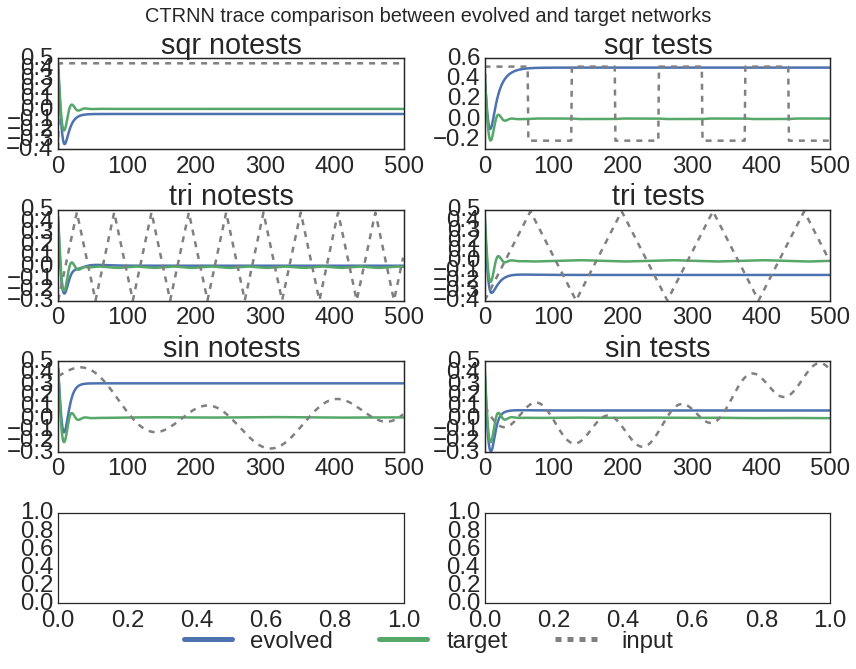

In [13]:
from matplotlib import patches,lines

fig,axes = plt.subplots(4,2,figsize=(9,5))
inputax = []

def plotCTRNN(ax,typ,tests,index=0):
    ax.set_title("%s %s" % (typ,tests))
    line1=ax.plot(ctrnnExp[typ][tests][index]['neur4'],label='model')
    line2=ax.plot(fixedExp[typ][tests][index]['neur4'],label='target')
    inputax.append(ax.twinx())
    inputax[-1].plot(fixedExp[typ][tests][index]['input0'],color='gray',linestyle='--')
    inputax[-1].set_yticklabels([])

index = 1
for i,typ in enumerate(ctrnnExp.keys()):
    for j,tests in enumerate(ctrnnExp[typ]):        
        plotCTRNN(axes[i,j],typ,tests,index=index)
    
# plotCTRNN(axes[1],'saw',50,0.5,index=index)
# plotCTRNN(axes[2],'saw',50,0.75,index=index)
# plotCTRNN(axes[3],'saw',100,0.25,index=index)
# plotCTRNN(axes[4],'saw',100,0.5,index=index)
# plotCTRNN(axes[5],'saw',100,0.75,index=index)
# plotCTRNN(axes[6],'saw',150,0.25,index=index)
# plotCTRNN(axes[7],'saw',150,0.5,index=index)
# plotCTRNN(axes[8],'saw',150,0.75,index=index)

fig.set_size_inches(12,9)


model_patch = lines.Line2D([0],[0],color=seaborn.color_palette()[0],linewidth=5)
target_patch = lines.Line2D([0],[0],color=seaborn.color_palette()[1],linewidth=5)
input_line = lines.Line2D([0],[0],color='gray',linestyle='--',linewidth=5)

plt.figlegend([model_patch,target_patch,input_line],['evolved','target','input'],'lower center',ncol=3,bbox_to_anchor = (0,-0.05,1,1),
            bbox_transform = plt.gcf().transFigure)

fig.suptitle('CTRNN trace comparison between evolved and target networks',fontsize=20)
fig.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

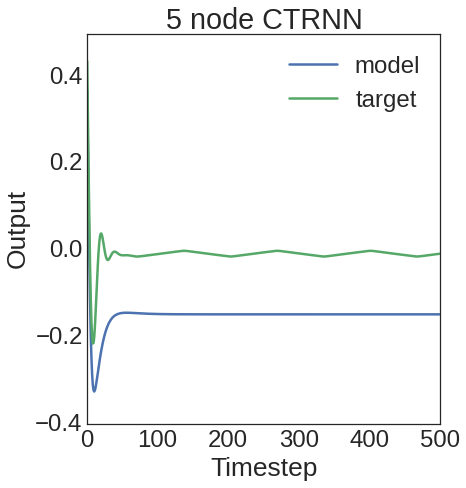

In [14]:
data = ctrnnExp['tri']['tests'][1]

fig,ax = plt.subplots(figsize=(7,7))

line1=ax.plot(data['neur4'],label='model')
line2=ax.plot(fixedExp['tri']['tests'][1]['neur4'],label='target')

plt.ylabel('Output')
plt.xlabel('Timestep')

ax.set_yticks([-.4,-.2,0,.2,.4])
# ax.set_xticks([0,500])

plt.legend()

# inputax.append(ax.twinx())
# inputax[-1].plot(fixedExp['tri']['tests'][1]['input0'],color='gray',linestyle='--')
# inputax[-1].set_yticklabels([])
plt.title('5 node CTRNN')

plt.subplots_adjust(left=0.2)


fig.savefig('5node_ctrnn.pdf')

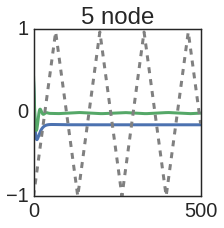

In [22]:
fig,ax = plt.subplots(figsize=(3,3))
inputax = []

seaborn.set_context("paper", font_scale=2.5, rc={"lines.linewidth": 3})

ax.set_title('5 node')
line1=ax.plot(ctrnnExp['tri']['tests'][1]['neur4'],label='model')
line2=ax.plot(fixedExp['tri']['tests'][1]['neur4'],label='target')
inputax.append(ax.twinx())
inputax[-1].plot(fixedExp['tri']['tests'][1]['input0'],color='gray',linestyle='--')
inputax[-1].set_yticklabels([])

ax.set_xticks([0.,500.])
ax.set_yticks([-1.,0.,1.])

fig.savefig('5node_small.pdf')